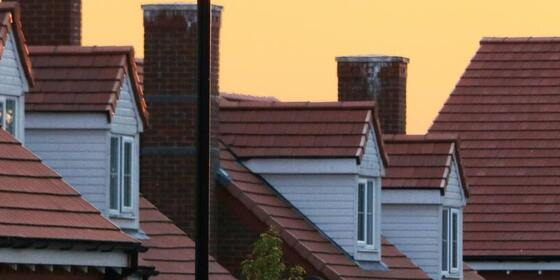

#**Kaggle-HousePrices-Study**

## **Loaded Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

base_path = os.path.join(os.getcwd(), 'drive','MyDrive' ,'datasets', 'house-prices')
train = pd.read_csv(os.path.join(base_path, 'train.csv')) #Train data Load
test = pd.read_csv(os.path.join(base_path, 'test.csv')) #Train data Load
submission = pd.read_csv(os.path.join(base_path, 'sample_submission.csv'))

In [3]:
# print(df.shape)  # 데이터의 크기 확인
# print(df.dtypes)  # 각 열의 데이터 타입 확인
# print(df.describe())  # 기본 통계량 확인

train.shape

(1460, 81)

In [4]:
train.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [11]:
train.dtypes.value_counts()

,count
object,43
int64,35
float64,3


In [14]:
train.select_dtypes(include=['object']).head(5)  #문자열만 모아보기

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [15]:
train.select_dtypes(include=['int64', 'float64']).head(5)  #숫자만 모아보기

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [22]:
print(sorted(train.YearBuilt.unique().tolist()))

[1872, 1875, 1880, 1882, 1885, 1890, 1892, 1893, 1898, 1900, 1904, 1905, 1906, 1908, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]


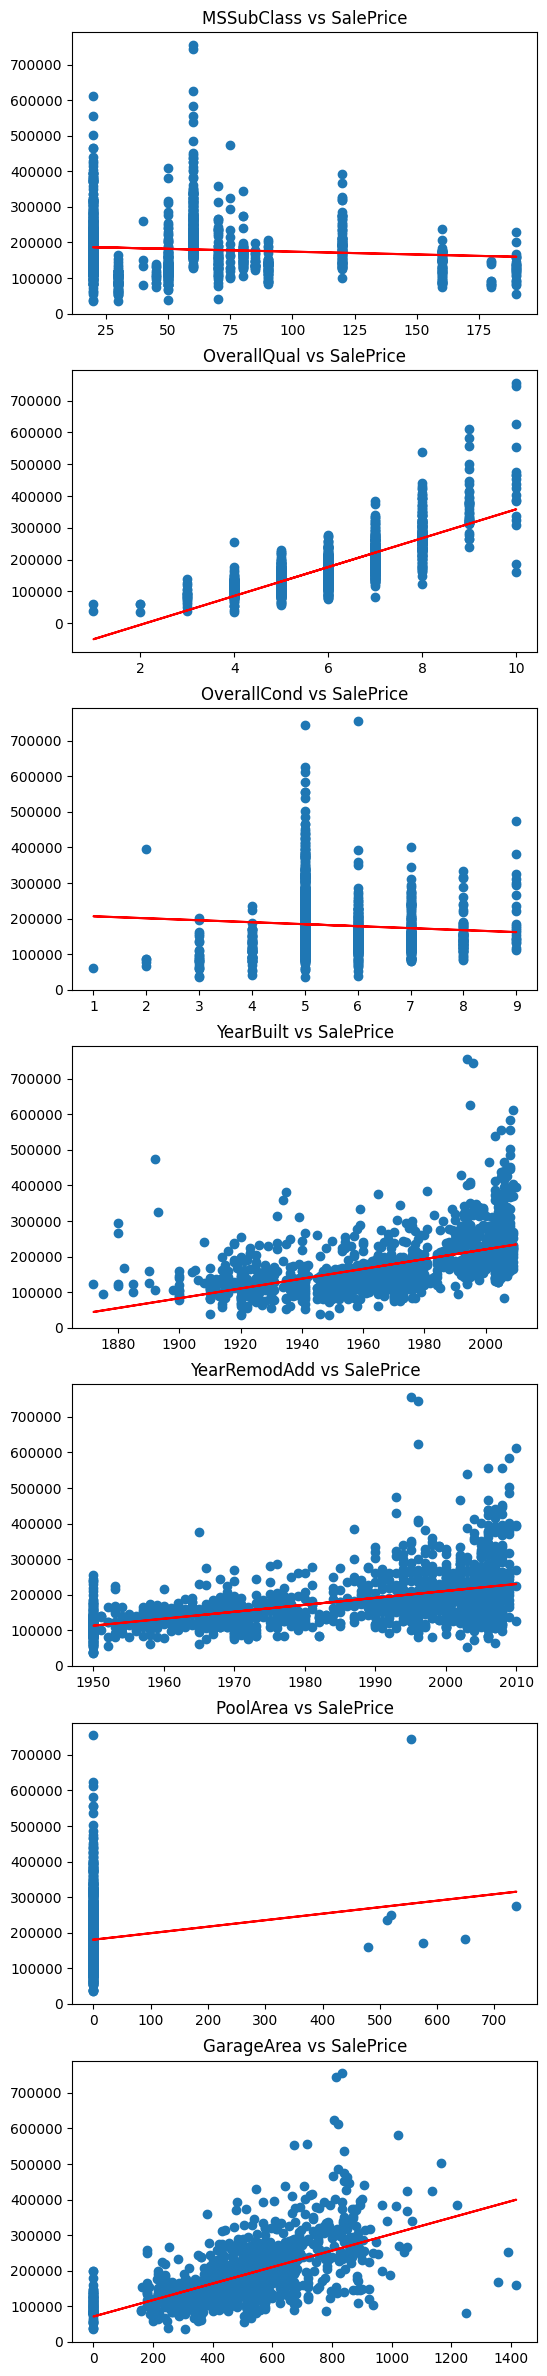

In [50]:
def viz_skatter(columns, target):
  num_of_columns = len(columns)

  fig, ax = plt.subplots(nrows=num_of_columns, ncols=1, figsize=(6, 30))

  for i in range(num_of_columns):
    # 그래프 그리기
    ax[i].scatter(train[columns[i]], train[target])  # 산점도 찍기
    m, b = np.polyfit(train[columns[i]], train[target], 1)  # 기울기(m)와 절편(b) 계산
    ax[i].plot(train[columns[i]], m*train[columns[i]] + b, color='red')  # 회귀선 그리기

    # 그 외것 설정하기
    ax[i].set_title(f'{columns[i]} vs {target}')  # 타이틀 설정

  plt.show()

columns = ['MSSubClass','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'PoolArea', 'GarageArea']

viz_skatter(columns, 'SalePrice')

In [46]:
train[train['PoolArea'] == 0]['SalePrice'].mean()

np.float64(180404.66345492084)

In [47]:
train[train['PoolArea'] != 0]['SalePrice'].mean()  # 수영장 있는 집이면 더 비쌈 그럼 주거 면적도 더 넓은건가?

np.float64(288138.5714285714)

In [48]:
train[train['PoolArea'] == 0]['GrLivArea'].mean()

np.float64(1508.5581555402616)

In [49]:
train[train['PoolArea'] != 0]['GrLivArea'].mean()  # 맞네;; 그냥 넓은 집에 수영장이 있는거네

np.float64(2948.8571428571427)

<Axes: xlabel='SalePrice', ylabel='Count'>

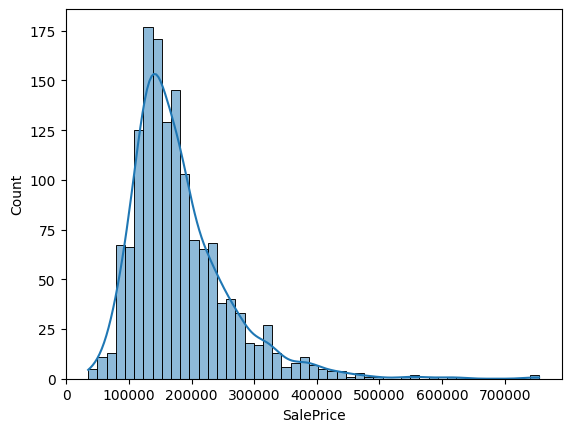

In [62]:
sns.histplot(train['SalePrice'], kde=True) #집값의 분포도 알아보기

In [65]:
train.sort_values(by='SalePrice', ascending=False).head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
1046,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
798,799,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,485000
